In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')

In [4]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
# Clean data by Clean the data by filtering out days when the page views were 
# in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [6]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [7]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis should be Page Views.

def draw_line_plot():
    # Draw line plot

    fig, ax = plt.subplots(figsize=(14, 9))

    ax.plot(df, color = 'red')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    plt.xlabel('Date')
    plt.ylabel('Page Views')
    

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


In [ ]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be
# Years and the label on the y axis should be Average Page Views.

In [11]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    
    # Add new coloumns year and month labeling each date by the year and month so that we can group by easily
    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
    
    # Groupby according to each year containing months finding average values for each month
    # unstack generate a df of each year (index) vs months (columns) with values corresponding to this pair 
    
    df_bar = df_bar.groupby(['year','month'])['value'].mean().unstack()

    # Draw bar plot
    
    fig = df_bar.plot.bar(legend=True, figsize=(15, 12), ylabel='Average Page Views', xlabel = 'Years', fontsize=10).figure
    
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Month')


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


In [ ]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar 
# to "examples/Figure_3.png". These box plots should show how the values are distributed within 
# a given year or month and how it compares over time. The title of the first chart should be 
# Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). 
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
# The boilerplate includes commands to prepare the data.

In [13]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(14, 10), sharex=False, sharey=False)
    
    
    sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axes[0]).set(xlabel = 'Year', ylabel = 'Page Views', title = 'Year-wise Box Plot (Trend)')
    
    
    sns.boxplot(x = df_box['month'], y = df_box['value'], order = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax = axes[1]).set(xlabel = 'Month', ylabel = 'Page Views', title = 'Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


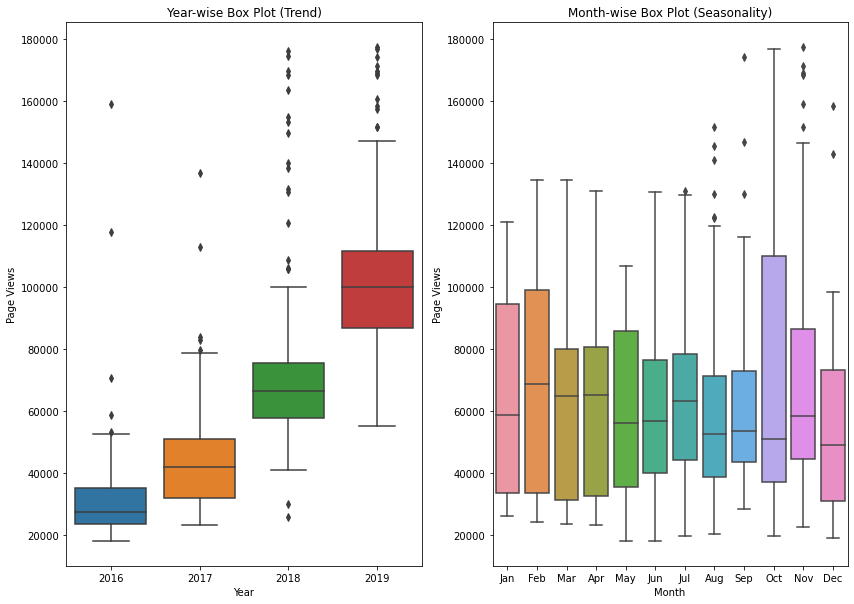

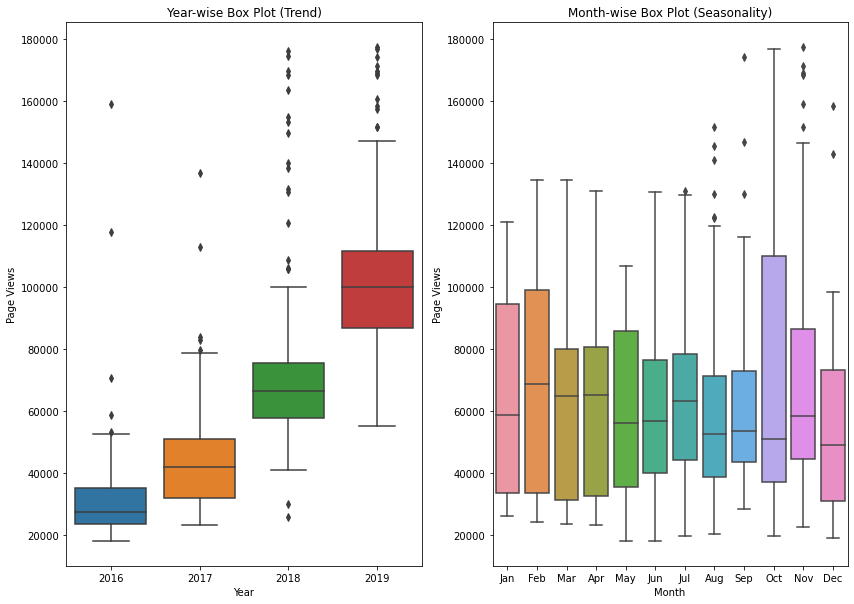

In [14]:
draw_box_plot()